In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pymc3 as pm
import arviz as az

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


<AxesSubplot:>

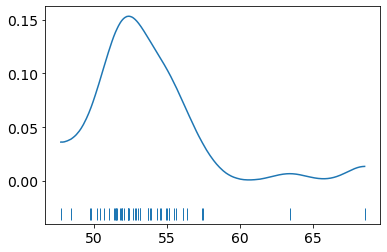

In [2]:
samples = np.loadtxt("./data/chemical_shifts.csv")
az.plot_kde(samples, rug=True)

上述数据分布近似高斯分布$\cal{N}(\mu, \sigma)$, 其中$\mu$和$\sigma$待估计.  
这里假设:

$\mu \sim \cal{U}(l_a, l_b)$  
$\sigma \sim |\cal{N}(\mu_\sigma, \sigma_\sigma)|$

下面开始构建PyMC贝叶斯估计模型.

In [3]:
with pm.Model() as model:
    mu = pm.Uniform("mu", lower=20, upper=70)
    sigma = pm.HalfNormal("sigma", sd=5)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=samples)
    
    trace = pm.sample(1000, random_seed=42)
    az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


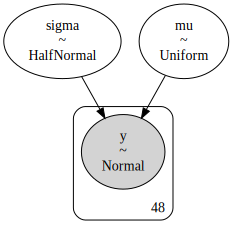

In [4]:
pm.model_graph.model_to_graphviz(model)

In [5]:
# # 总结后验
with model:
    az.summary(trace, var_names=["mu"])
#     # az.plot_trace(trace)
#     # plt.tight_layout()
    
#     # az.plot_pair(trace, kind="kde", fill_last=False)
    
#     az.summary(trace)
    # az.plot_posterior(trace, rope=[0.45, 0.55])
    # az.plot_posterior(trace, ref_val=0.5)